In [1]:
import cv2 as cv
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [34]:
def visualize_optical_flow(video_path):
    cap = cv.VideoCapture(video_path)
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        cap.release()
        return

    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

    fig, ax = plt.subplots()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
        
        # Apply the 'jet' colormap to the magnitude
        magnitude_colored = cv.applyColorMap((magnitude * 255).astype(np.uint8), cv.COLORMAP_JET)

        # Create an RGBA image with the colored magnitude and a transparent background
        rgba = cv.cvtColor(magnitude_colored, cv.COLOR_BGR2RGBA)
        rgba[:, :, 3] = 127  # Set the alpha channel (transparency) to 50%

        ax.imshow(rgba)
        display(fig)
        clear_output(wait=True)
        prev_gray = gray

    cap.release()
    plt.close()

KeyboardInterrupt: 

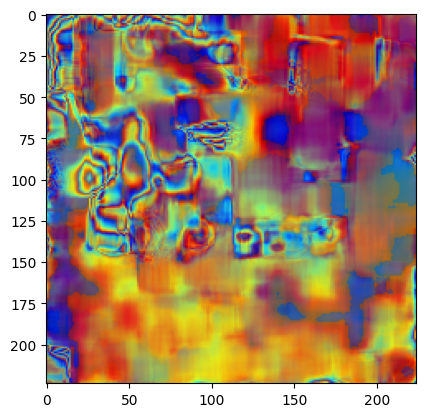

In [35]:
# Call the function with your video path
video_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\videos_adjusted\0293_processed.mp4"
visualize_optical_flow(video_path)